In [1]:
import pandas
from tqdm.auto import tqdm
import requests
import glob

In [2]:
data = []

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import GaussianKDE
import matplotlib.patheffects as pe
import numpy as np

In [4]:
def str_to_seconds(time):
    com = str(time).replace(".", ":").split(":")
    try: 
        if len(com) == 3:
                seconds = int(com[2])+60*int(com[1])+3600*int(com[0])
        elif len(com) == 2:
            seconds = 60*int(com[0])+ int(com[1])
        else:
            seconds = -1
    except ValueError:
        seconds = -1
    return seconds

In [5]:
data = []
for race in glob.glob("/home/daniel/repositories/personal/scottish-hillrunners-results/races/Tinto/*.csv"):
    data.append(pandas.read_csv(race))
frames = pandas.concat(data)

In [6]:
frames['FinishTime']

0        30.50
1        31.35
2        32.41
3        32.54
4        33.18
        ...   
211    1:10:25
212    1:11:46
213    1:17:31
214    1:17:41
215    1:17:44
Name: FinishTime, Length: 6470, dtype: object

In [7]:
frames['Finish Time (seconds)'] = frames['FinishTime'].map(str_to_seconds)

In [8]:
frames['Finish Time (seconds)']/60

0      30.833333
1      31.583333
2      32.683333
3      32.900000
4      33.300000
         ...    
211    70.416667
212    71.766667
213    77.516667
214    77.683333
215    77.733333
Name: Finish Time (seconds), Length: 6470, dtype: float64

In [10]:
frames[frames['Finish Time (seconds)']>0].sort_values('Finish Time (seconds)', ascending=True)

,RunnerPosition,Surname,Firstname,Club,RunnerCategory,FinishTime,FinishPosition,Finish Time (seconds)
0,1,McLeod,Mark,Moorfoots,NaN,24.06,NaN,1446
1,2,Emsley,Nick,Arran,NaN,24.54,NaN,1494
2,3,Aitken,Martha,Carnethy,F,25.26,NaN,1526
3,4,Stokoe,Deborah,Westerlands,F,26.11,NaN,1571
4,5,Aitken,Evie,Carnethy,F,27.07,NaN,1627
...,...,...,...,...,...,...,...,...
230,231,Mickleburgh,Rebecca,Unattached,F,01:20:25,NaN,4825
127,128,Allan,Eileen,U/A,F,83:36,NaN,5016
99,100.0,Webb-Bowen,John,Edin West,SV,86:38,NaN,5198
155,NaN,Wilson,Abbie,Hartfell Hill Running Club,FS,01:28:03,156.0,5283


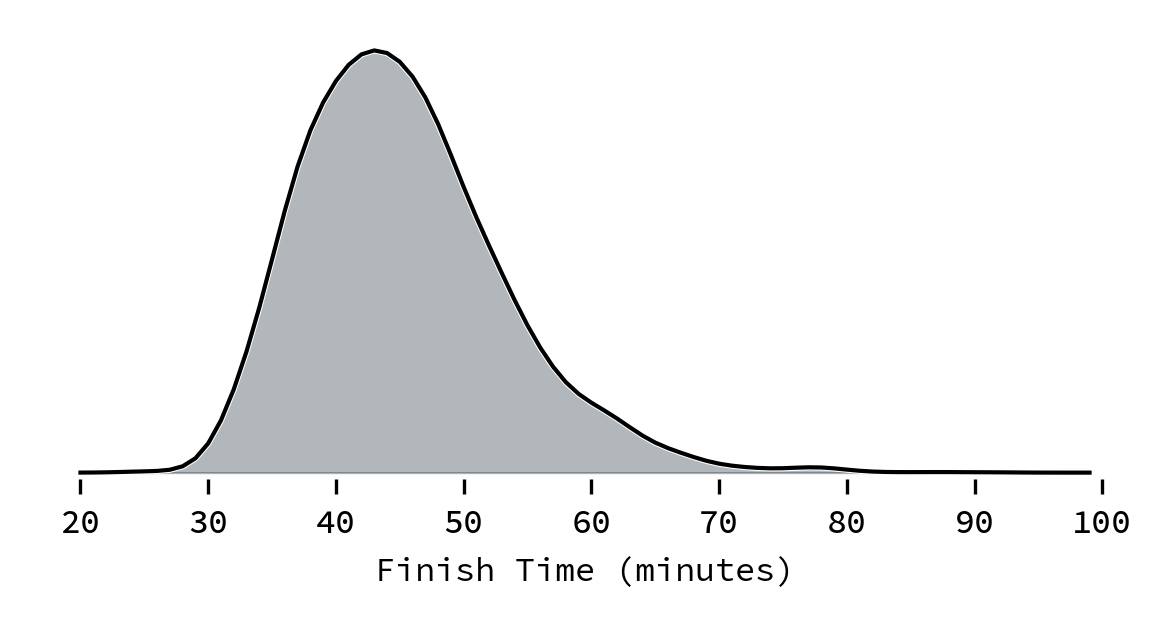

In [11]:
f, ax = plt.subplots(1,1, dpi=300, figsize=(4,2))
axis = range(20,100,1)

#ax.axvline(180)
#ax.axvline(240)
#ax.axvline(300)

ax.fill_between(axis, 100*GaussianKDE(frames['Finish Time (seconds)']/60)(axis), alpha=0.3, color = '#00111f')
ax.plot(axis, 100*GaussianKDE(frames['Finish Time (seconds)']/60)(axis), color="black", linewidth=1, path_effects=[pe.Stroke(linewidth=1.5, foreground='w'), pe.Normal()])
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set(yticklabels=[])
ax.tick_params(left=False)
ax.grid(False)
f.tight_layout()

ax.set_xlabel("Finish Time (minutes)")
f.savefig("tinto-finish-times.jpg")

In [12]:
frames['Finish Time (seconds)'].quantile(0.5)/60

44.11666666666667

In [13]:
frames['RunnerCategory'].unique()

array(['S', 'V', 'FS', 'SV', 'SSV', 'SSSV', 'VS', 'FV', 'FJ', 'FSV',
       'FDS', nan, 'J', 'F', 'M', 'M40', 'M50', 'M60', 'F40', 'F50',
       'M70', 'F60', 'M80', 'v', 'f', 'v50', 'v60', 'fv', 'f50', 'fv50',
       'M ', 'Vet', 'S/Vet', 'Jnr', 'U 15', 'S/L', 'L/S', 'Over60',
       'L/Vet',
       'Due to the exceptionly bad weather the following were not recorded at the finish :',
       'MV', 'MJ', 'F70', 'MS', 'V50', 'V60', 'V40'], dtype=object)

In [23]:
men = frames[frames['RunnerCategory'].apply(lambda x: str(x)[-1] in ("M", "S", "V", "O"))]
women = frames[frames['RunnerCategory'].apply(lambda x: str(x)[-1] in ("F", "f"))]
#nbinary = frames[frames['Category'].apply(lambda x: x[-1])=="N"]

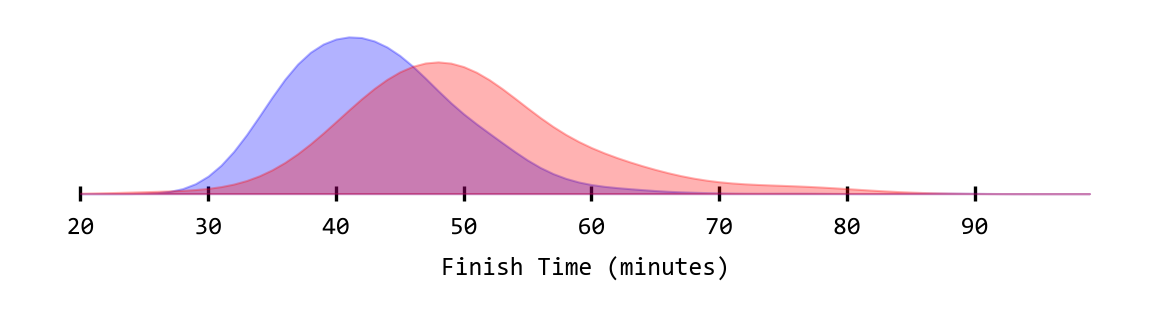

In [18]:
f, ax = plt.subplots(1,1, dpi=300, figsize=(4,1))
axis = range(20,100,1)

#ax.axvline(180)
#ax.axvline(240)
#ax.axvline(300)

ax.fill_between(axis, 100*GaussianKDE(men['Finish Time (seconds)']/60)(axis), alpha=0.3, color = 'blue')
ax.fill_between(axis, 100*GaussianKDE(women['Finish Time (seconds)']/60)(axis), alpha=0.3, color = 'red')
#ax.fill_between(axis, 100*GaussianKDE(nbinary['Chip Time (seconds)']/60)(axis), alpha=0.3, color = 'yellow')

#ax.plot(axis, 100*GaussianKDE(frames['Chip Time (seconds)']/60)(axis), color="black", linewidth=1, path_effects=[pe.Stroke(linewidth=1.5, foreground='w'), pe.Normal()])
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set(yticklabels=[])
ax.tick_params(left=False)
ax.grid(False)
f.tight_layout()

from math import ceil
axis = range(120,420,1)

#ax.axvline(180)
#ax.axvline(240)
#ax.axvline(300)

ax.set_xticks([20, 30, 40, 50, 60, 70, 80, 90])
ax.set_xticklabels([20, 30, 40, 50, 60, 70, 80, 90], 
               path_effects=[pe.Stroke(linewidth=1, foreground='w'), pe.Normal()],
               fontdict={"fontsize": 6, "fontfamily": "Consolas"},
               );

ax.set(yticklabels=[])
ax.tick_params(left=False)
ax.grid(False)
    
f.tight_layout()


ax.set_xlabel("Finish Time (minutes)", fontdict={"fontsize": 6, "fontfamily": "Consolas"},)

f.savefig("tinto-mens-womens-finish.png")

In [24]:
men

,RunnerPosition,Surname,Firstname,Club,RunnerCategory,FinishTime,FinishPosition,Finish Time (seconds)
0,1,Lennox,Jethro,Shettleston,S,30.50,NaN,1850
1,2,Anthony,Alasdair,Ochil,S,31.35,NaN,1895
2,3,Lenton,Tim,Lothian,S,32.41,NaN,1961
3,4,Marshall,Brain,HELP,S,32.54,NaN,1974
4,5,Ward,Adam,Carnethy,V,33.18,NaN,1998
...,...,...,...,...,...,...,...,...
175,176,Briggs,Andrew,Penicuik Harriers,M,0:55:09,NaN,3309
178,179,Howie,Frazer,Unattached,M,0:55:26,NaN,3326
179,180,Murray,Craig,Unattached,M,0:55:44,NaN,3344
200,201,Moss,Alastair,Unattached,M,1:00:21,NaN,3621


In [34]:
frames["RunnerCategory"].unique()

array(['S', 'V', 'FS', 'SV', 'SSV', 'SSSV', 'VS', 'FV', 'FJ', 'FSV',
       'FDS', nan, 'J', 'F', 'M', 'M40', 'M50', 'M60', 'F40', 'F50',
       'M70', 'F60', 'M80', 'v', 'f', 'v50', 'v60', 'fv', 'f50', 'fv50',
       'M ', 'Vet', 'S/Vet', 'Jnr', 'U 15', 'S/L', 'L/S', 'Over60',
       'L/Vet',
       'Due to the exceptionly bad weather the following were not recorded at the finish :',
       'MV', 'MJ', 'F70', 'MS', 'V50', 'V60', 'V40'], dtype=object)

In [85]:
def remap_categories(df, category_mapping):
    """
    Remap RunnerCategory values in a dataframe based on a mapping dictionary.
    
    Args:
        df: pandas DataFrame with a 'RunnerCategory' column
        category_mapping: dict mapping old category values to new ones
    
    Returns:
        Modified dataframe with categories remapped
    """
    for old_category, new_category in category_mapping.items():
        df.loc[df["RunnerCategory"] == old_category, "RunnerCategory"] = new_category
    return df

# Apply category remapping
category_remap = {"S": "M", "M ":"M", "MS": "M", "Over 60": "M60", "Over60": "M60", "MV": "M40", "v": "M40", "V": "M40", "SV": "M50", "S/Vet": "M50", "SSV": "M60", "SSSV": "M70", "V40": "M40", "V50": "M50", "V60": "M60", "V70": "M70",
                  "f": "F", "FS": "F", "fv": "F40", "fv50": "F50", "f50": "F50", "v60": "M60", "FV": "F40", "FSV": "F50", "FSSV": "F60", "FSSSV": "F70", "FV40": "F40", "FV50": "F50", "FV60": "F60", "FV70": "F70"}
frames = remap_categories(frames, category_remap)


In [86]:
frames["RunnerCategory"].unique()

array(['M', 'M40', 'F', 'M50', 'M60', 'VS', 'F40', 'FJ', 'F50', 'FDS',
       nan, 'J', 'M70', 'F60', 'M80', 'Vet', 'Jnr', 'U 15', 'S/L', 'L/S',
       'L/Vet',
       'Due to the exceptionly bad weather the following were not recorded at the finish :',
       'MJ', 'F70'], dtype=object)

/tmp/ipykernel_6704/3239483654.py:61: UserWarning: The figure layout has changed to tight
  f.tight_layout()


Text(0.5, 58.25, 'Finish Time (minutes)')

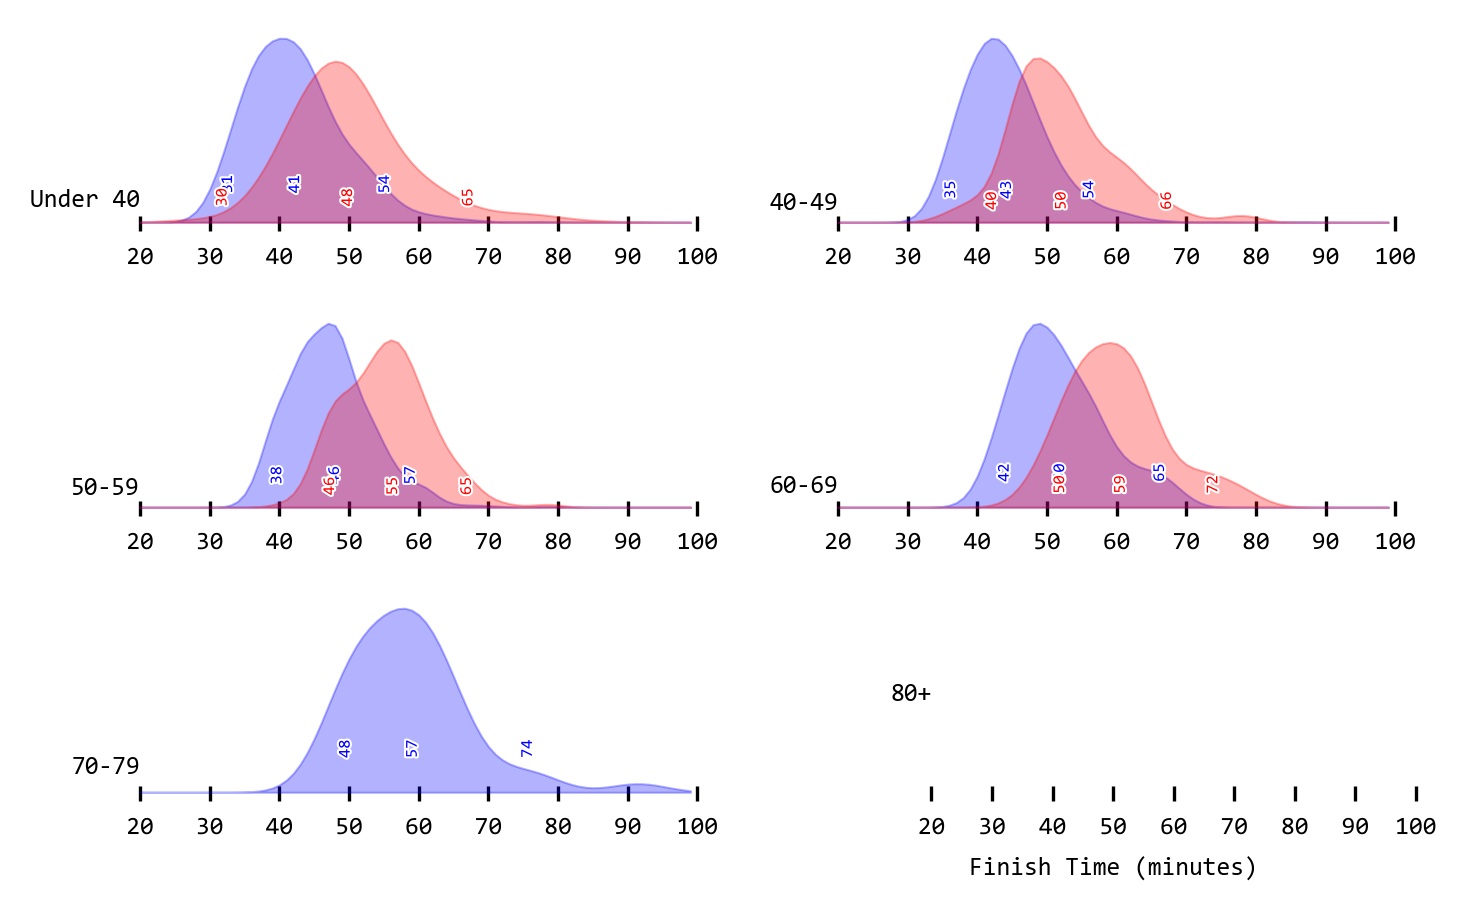

In [87]:
from math import ceil
axis = range(20,100,1)

categories = ("", "40", "50", "60", "70", "80")
category_labels = {
    "": "Under 40",
    "40": "40-49",
    "50": "50-59",
    "60": "60-69",
    "70": "70-79",
    "80": "80+",
}
f, axes = plt.subplots(ceil(len(categories)/2),2, dpi=300, figsize=(5,3), constrained_layout=True)
for category, ax in zip(categories, axes.flatten()):
    men = frames[frames['RunnerCategory']==(f"M{category}")]
    women = frames[frames['RunnerCategory']==(f"F{category}")]

    try:
        ax.fill_between(axis, 100*GaussianKDE(men['Finish Time (seconds)']/60)(axis), alpha=0.3, color = 'blue')
        for percentile in [0.05, 0.5, 0.95]:
            median = men['Finish Time (seconds)'].quantile(percentile)/60
            ax.text(median, 1.0, f"{int(median)}", ha="left", 
                    rotation=90,
                    path_effects=[pe.Stroke(linewidth=1, foreground='w'), pe.Normal()],
                    fontdict={"fontsize": 4, "fontfamily": "Consolas"}, color="blue")
    except:
        pass

    try:
        ax.fill_between(axis, 100*GaussianKDE(women['Finish Time (seconds)']/60)(axis), alpha=0.3, color = 'red')
        for percentile in [0.05, 0.5, 0.95]:
            median = women['Finish Time (seconds)'].quantile(percentile)/60
            ax.text(median, 0.6, f"{int(median)}", ha="left", 
                rotation=90,
                path_effects=[pe.Stroke(linewidth=1, foreground='w'), pe.Normal()],
                fontdict={"fontsize": 4, "fontfamily": "Consolas"}, color="red")
    except:
        pass

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.text(20, 0.5, f"{category_labels[category]}", ha="right", fontdict={"fontsize": 6, "fontfamily": "Consolas"},)
    
    
        

    
    ax.set_xticks([20, 30, 40, 50, 60, 70, 80, 90, 100])
    ax.set_xticklabels([20, 30, 40, 50, 60, 70, 80, 90, 100], 
                   path_effects=[pe.Stroke(linewidth=1, foreground='w'), pe.Normal()],
                   fontdict={"fontsize": 6, "fontfamily": "Consolas"},
                   );
    
    ax.set(yticklabels=[])
    ax.tick_params(left=False)
    ax.grid(False)
    
f.tight_layout()

ax.set_xlabel("Finish Time (minutes)", fontdict={"fontsize": 6, "fontfamily": "Consolas"},)



#f.savefig("gsr-2022-finish-times.jpg")
